In [3]:

import pandas as pd #used for data manipulation like removing duplicates merging joining and reshaping datasets
import numpy as np  #used for dealing with large multi dimensional arrays and matrices and a collection of mathematical 
                    #operations to operate on these arrays


# Data visualization
import matplotlib.pyplot as plt  #creating static, interactive, and animated visualizations
                                 #pyplot allows detailed customization of colors, line styles, markers, 
                                 #and other plot attributes.
import seaborn as sns #Seaborn is a data visualization library built on top of Matplotlib in Python.    
                      #It provides a high-level interface for drawing attractive and informative statistical graphics
import plotly.express as px #used for interactive plots where user can zoom, pan, hover over data points to see details, 
                            #and interact with the plot elements in various ways. whereas matplotlib is used for static plots only


# Off FutureWarnings
import warnings #This line imports the warnings module, which provides a way to control and filter warning messages in Python.
warnings.filterwarnings('ignore')  #This line sets the filter for warnings to "ignore", which means that all warning messages
                                   #will be suppressed and not shown.

#Resampling
from imblearn.over_sampling import SMOTENC 
#imblearn: stands for (imbalanced-learn) library used for handling imbalanced datset
#ie dataset with skewed proportion. it does this through resampling strategies
#over_sampling: This sub-module of imblearn contains methods to perform over-sampling, which aims to balance the dataset 
#by increasing the number of samples in the minority class.   
#SMOTENC: stands for Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC).
#useful when you have a dataset with a mix of numerical (continuous) and categorical (nominal) features. 
#It generates synthetic samples for the minority class while taking into account the categorical nature of some features.
from sklearn.utils import class_weight #sklearn.utils is a scikit learn library.
#Key Uses of class_weight
#Handling Imbalanced Datasets: In many real-world datasets, the classes may be imbalanced, meaning some classes 
#have significantly more samples than others. This can lead to biased models that perform poorly on the minority classes. 
#class_weight helps to address this issue by assigning different weights to classes based on their frequency.

#Calculating Class Weights: The class_weight module provides the compute_class_weight function, which 
#calculates the appropriate class weights. These weights can then be used to adjust the learning process of machine 
#learning models.

#Dimension Reduction
from sklearn.decomposition import PCA #PCA is used for dimensionality reduction and feature extraction.
#converts high dimensional data into low dimensional data, reducing the number of essential features while preserving the essential
#structure of the data
#identifies the principal components (or directions) that explain the maximum variance in the data.
#These principal components can then be used as new features to represent the original data.

# Preprocessing
#In machine learning, preprocessing refers to the steps or transformations applied to the data 
#before it is fed to the algorithm for training
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder
#Standard scaler standardize features by removing the mean and scaling to unit variance.
#OneHotEncoder example 'red' could be represented as [1, 0, 0]
from sklearn.preprocessing import LabelEncoder
#Unlike OneHotEncoder, which creates binary vectors for each category, LabelEncoder assigns a unique integer to each category.
#example red can be encoded as 0,green as 1 and blue as 2


# Models
from sklearn.dummy import DummyClassifier
#The main purpose of DummyClassifier is to provide a baseline against which you can compare the performance of your 
#actual classifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#unlike RandomForestClassifier which builds trees independently GradientBoostingClassifier 
#builds a series of decision trees sequentially, where each tree corrects the errors of the previous one.
#GradientBoostingClassifier has parameters that can be tuned to optimize performance, such as learning_rate, 
#n_estimators (number of trees), max_depth (maximum depth of each tree), and 
#min_samples_split (minimum number of samples required to split an internal node).
from sklearn.model_selection import GridSearchCV
#uses parameter tuning to see which tune gives the best performance.

# Models Pipelines
from sklearn.compose import ColumnTransformer
#ColumnTransformer helps in applying different transformations (e.g., scaling, encoding) to different columns of the input dataset.
from sklearn.pipeline import Pipeline
#allows to chain multiple pre processing steps together 
#each step can be a transformer (like StandardScaler, OneHotEncoder, etc.) or 
#an estimator (like LogisticRegression, RandomForestClassifier, etc.). Data is passed through each step in the pipeline sequentially. 
#Output from one step is used as input to the next step. #assembles multiple pre processing steps with an estimator into a single object.
#example
#pipe = Pipeline([
#    ('scaler', StandardScaler()),    # Step 1: Scale the features
#    ('classifier', LogisticRegression(random_state=42))  # Step 2: Fit a logistic regression model
#])
from imblearn.pipeline import Pipeline as ImbPipeline

# Model evaluation
from sklearn import metrics
#module provides various functions for evaluating the performance of machine learning models. 
from sklearn.model_selection import train_test_split, GridSearchCV
#train_test_split is a function used for splitting datasets into two separate sets: a training set and a testing set.
#GridSearchCV: Performs an exhaustive search over a specified parameter grid, optimizing hyperparameters via 
#cross-validation to improve model performance.
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
#Accuracy Score: the proportion of correct predictions over the total number of predictions made.
#Precision score=TP/TP+FP where TP=number of true positives FP=number of false positives 
#Recall score=TP/TP+FN where FN=false negative
#f1_score=harmonic mean of precision and recall
from sklearn.metrics import roc_curve, auc
#roc plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings
#The AUC score quantifies the overall performance of a binary classification model based on the ROC curve
#AUC = 1: Perfect classifier. AUC = 0.5: Classifier performs no better than random guessing. AUC < 0.5: Classifier performs worse than random guessing (inverse classification).
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
#ummarizes the predictions made by a classifier, showing the number of true positives, 
#true negatives, false positives, and false negatives.

# Save model
import pickle

In [4]:
## Upload df
df = pd.read_csv(r'/Users/norahsrivastava/Downloads/failures_data.csv') 
# Verify if the data has duplicate values
data_duplicates = df.duplicated().sum()
print("Total duplicated values: ", data_duplicates)
pd.options.mode.chained_assignment = None
df

Total duplicated values:  0


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
# Verify if the data has duplicate values
data_duplicates = df.duplicated().sum()
print("Total duplicated values: ", data_duplicates)

Total duplicated values:  0


In [6]:
# Verify if the data has missing values
data_null = df.isnull().sum().sum()
#The first .sum() calculates the sum of True values (which are treated as 1) for each column.
#This gives us a Series where each element represents the number of missing values in that column.

#Second .sum(): This is applied to the Series resulting from the first .sum(). The second .sum() 
#calculates the sum of all the elements in this Series, giving the total number of missing values in the entire DataFrame.


print("Total missing values: ", data_null)

#First .sum(): Aggregates missing values column-wise to get the count of missing values in each column.
#Second .sum(): Aggregates the column-wise counts to get the total number of missing values in the entire DataFrame.

Total missing values:  0


In [7]:
## Verify the data structure
df.info()
#Provides a concise summary of the DataFrame, including the number of rows and columns, column names, number of non-null 
#entries per column, data types of each column, and memory usage.


#Useful for quickly understanding the structure and composition of the DataFrame, identifying columns with missing data, 
#and getting an overview of data types and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
## Numeric features analysis
df.describe()

#Provides a quick statistical summary of the DataFrame, focusing on numerical columns by default.
#Output: Includes count, mean, standard deviation, minimum, quartiles, and maximum for each numerical column.
#Purpose: Useful for understanding the distribution and key statistics of the dataset, which can help in data 
#exploration and initial analysis.

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
## Verify the proportion of column "Target"
df.Target.value_counts()

#df.Target: Selects the Target column from the DataFrame df.
#.value_counts(): Counts the occurrences of each unique value in the selected column and returns a Series indexed by the 
# unique values with their respective counts as values.


Target
0    9661
1     339
Name: count, dtype: int64

In [10]:
## Verify the proportion of column "Failure_type"
df['Failure Type'].value_counts()

#The df['Failure Type'].value_counts() method in pandas is used to count the occurrences of each unique value in the Failure Type 
#column of the DataFrame df. This is useful for understanding the distribution of different failure types within the datase

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [11]:
rename_columns = {
    'UDI':'ID',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]' : 'Process_temperature',
    'Rotational speed [rpm]' : 'Rotational_speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool_wear',
    'Product ID' : 'Product_ID',
    'Failure Type': 'Failure_type'    
}  
df.rename(rename_columns, axis = 1, inplace = True)

#to rename the columns. this step is not necessary

In [12]:
# Analysing redundance value, count failures on "Target" column
count_failures = (df['Target'] == 1).sum()
print('Number of failures:', count_failures)
# Sum of occurrences of 'Failure_type' other than 'No Failure'
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()
print('Sum of failures different of "No Failure":', sum_failures)

#df.loc[...] selects these rows, and , 'Failure_type' specifies that only the Failure_type column is considered.
#.count() counts the non-null entries in this filtered Failure_type column, effectively counting the 
#occurrences of failure types other than 'No Failure' where Target is 1.


Number of failures: 339
Sum of failures different of "No Failure": 330


In [13]:
# Filter the rows with has 1 in the column "Target" and 'No Failure' in the column 'Failure_type'
rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]

# Remove this filtered row in the main df

df.drop(rows_to_remove.index, inplace=True)

#in the above block we saw that there are 9 ambiguos values which we need to remove so here we are doing that
#rows_to_remove.index provides the indices of the rows to be removed.
#df.drop(rows_to_remove.index, inplace=True) drops these rows from df using their indices
#inplace=True modifies the original DataFrame df directly without needing to assign the result to a new variable.

In [14]:
#Removing unnecessary columnds

drop_columns = ["ID", "Product_ID", "Target"]

#This line defines a list called drop_columns that contains the names of the columns you want to remove from the DataFrame.


df.drop(drop_columns, axis = 1, inplace = True)

# here drop_columns consists of the columns that are to be removed
# axis=1 refers that column is being removed. in pandas axis=0 is for rows and axis=1 is for columns
#inplace='True' is ensuring that the changes are being made in the original dataframe without the need to assign the result to 
#a new variable

In [15]:
# Removing "Random Failures" of the "Failure_type" column.
df = df.loc[df['Failure_type'] != 'Random Failures']

#in doing this we are updating the dataframe df to include only those rows where the failure type is not equal to random failure 
# here 
#df['Failure_type'] != 'Random Failures' creates a boolean mask where True indicates rows where the value in the 'Failure_type' 
#column is not equal to 'Random Failures'.
#df.loc[...] accesses the rows in df that satisfy the condition specified by the boolean mask.


In [16]:
## Renaming the classes
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}
df['Type'].replace(rename_type, inplace = True)

#df['Type'] selects the 'Type' column in the DataFrame df.
#replace(rename_type, inplace=True) replaces each old class label in 'Type' with its corresponding new label 
#according to the rename_type dictionary.
#inplace=True modifies the DataFrame df directly without needing to assign the result to a new variable.

Text(0, 0.5, 'Count')

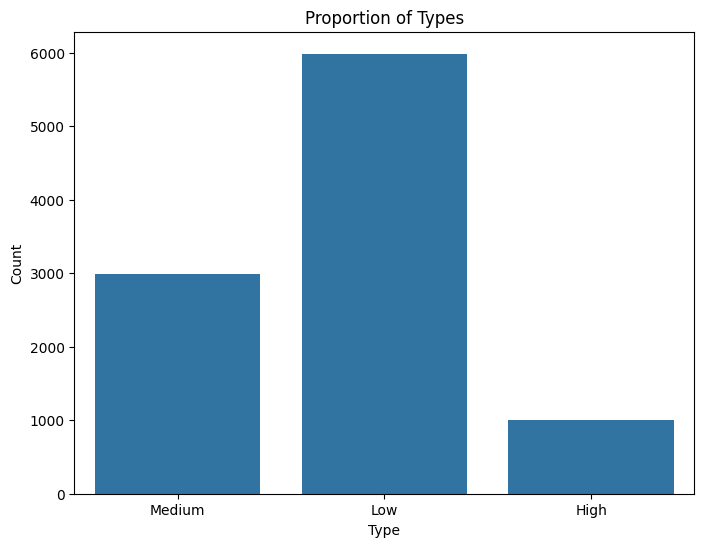

In [17]:
# Count types
tipo_contagem = df['Type'].value_counts()
#to determine how many times each type ('Low', 'Medium', 'High') appears in the 'Type' column of the DataFrame df.
#computes the frequency of each unique value in a Series (or DataFrame column) and returns a new Series where the 
#index labels are the unique values, and the values are their respective counts.

# Show graphic
plt.figure(figsize=(8, 6))
#Creates a new figure object with a specified size of 8 inches in width and 6 inches in height for the plot.
ax = sns.countplot(data=df, x='Type')
#Uses seaborn's countplot function to create a bar plot.
#data=df specifies that the data for plotting comes from the DataFrame df.
#x='Type' specifies that the 'Type' column in df should be plotted on the x-axis.
#The count plot displays the count of each unique value ('Low', 'Medium', 'High') in the 'Type' column.
plt.title('Proportion of Types')
plt.xlabel('Type')
plt.ylabel('Count')


# this block helps in Data Visualization: Provides a clear and intuitive visualization of categorical data distribution.

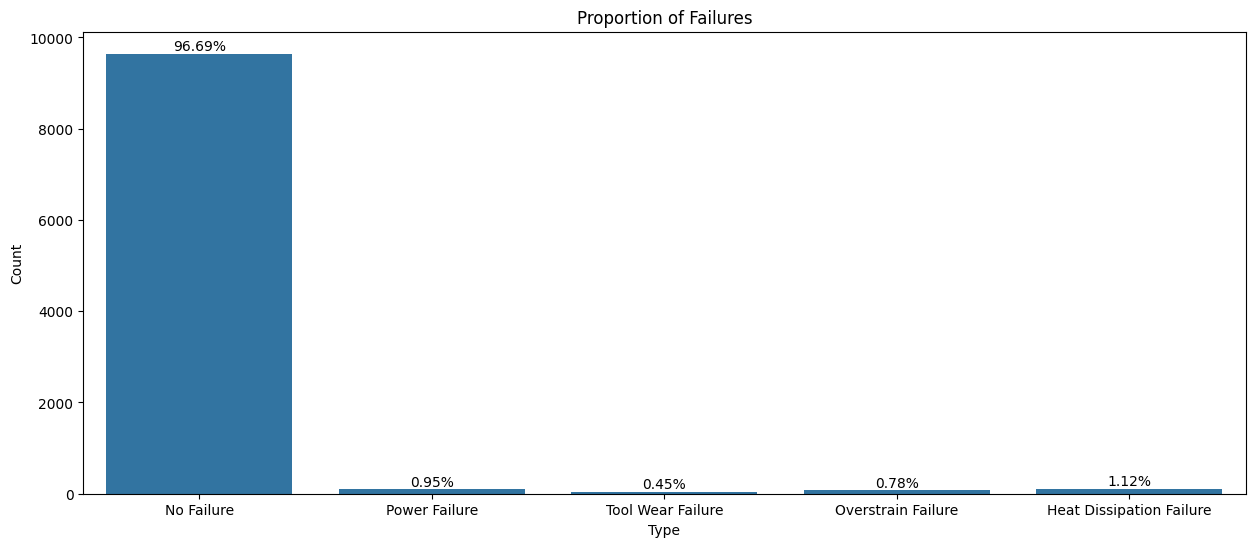

In [18]:
# Count types
tipo_contagem = df['Failure_type'].value_counts()

# Plot bar graphic
plt.figure(figsize=(15, 6))
#Creates a new figure object with a specified size of 15 inches in width and 6 inches in height for the plot.
ax = sns.countplot(data=df, x='Failure_type')
 #seaborn's countplot function to create a bar plot.
#df specifies that the data being used for plotting us coming from dataframe df.
#x='Failure_type' specifies that the 'Failure_type' column in df should be plotted on the x-axis.                                                                                              
plt.title('Proportion of Failures')
plt.xlabel('Type')
plt.ylabel('Count')
#ax = sns.countplot(data=df, x = 'Failure_type')

#PRACTICAL USE CASE-presenting insights about failure types to stakeholders or for inclusion in reports 
  #related to quality control, maintenance analysis, or process improvement.


# Add as percentages as labels
total = len(df['Failure_type'])
#Calculates the total number of observations (rows) in the 'Failure_type' column of the DataFrame df     
for p in ax.patches:  #ax.patches represents each rectangular bar (patch) in the plot.
    height = p.get_height() #p.get_height() retrieves the height (count) of each respective bar.
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
#ax.annotate adds a text annotation (f'{percentage:.2f}%') to each bar at the specified position 
#(p.get_x() + p.get_width() / 2, height).
#p.get_x():retrieves the x-coordinate of the left edge of the bar (patch) relative to the plot's coordinate system. 
#It represents the starting position of the bar along the x-axis.
#p.get_width():retrieves the width of the bar (patch). It represents the length of the bar along the x-axis.
#When ha='center', it means that the annotation text will be horizontally centered at the specified position
#When va='bottom', it means that the annotation text will be aligned vertically such that the bottom of the text touches the 
#specified y-coordinate (height in this case).
plt.show()  

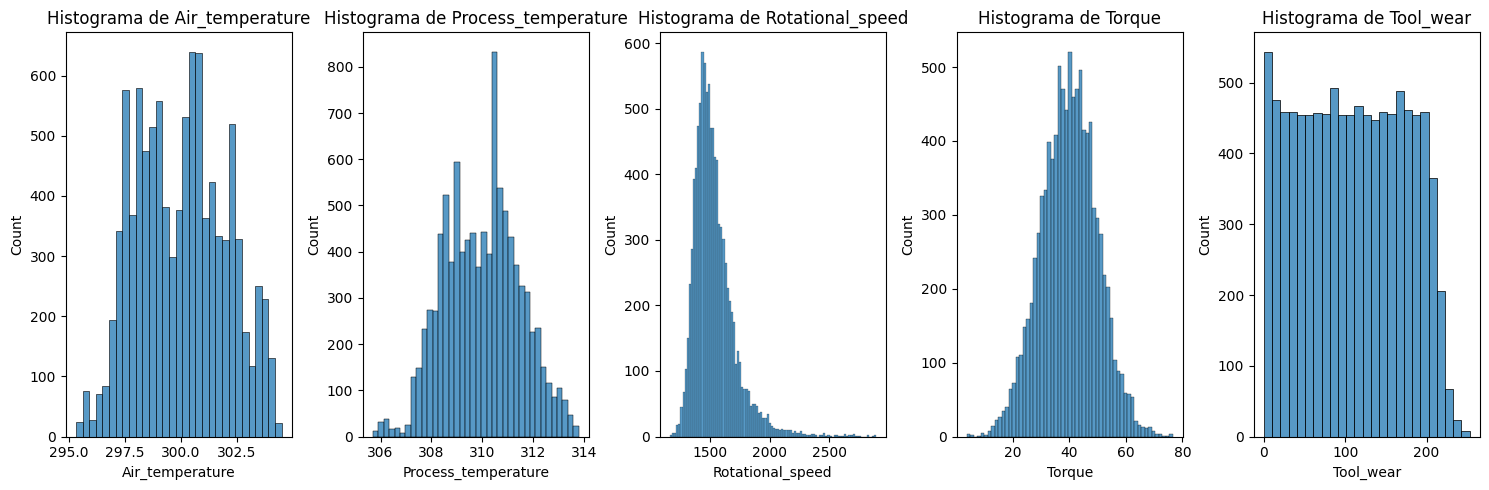

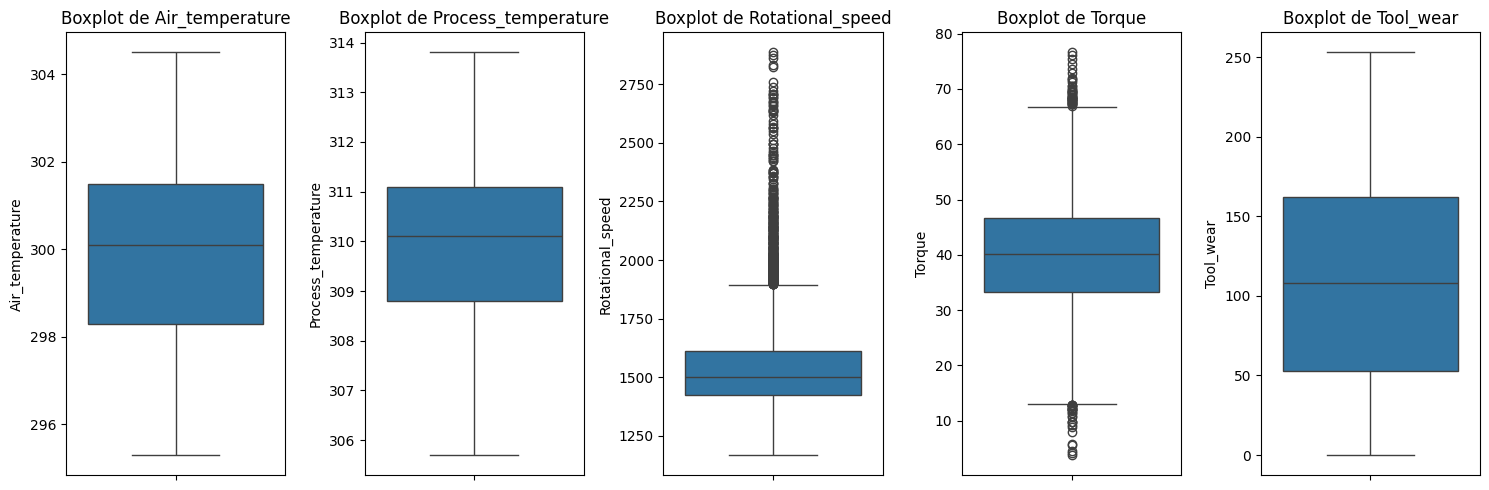

In [19]:
NUMERIC_FEATURES = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
CATEGORIC_FEATURES = ['Type']

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))

# Plot histograms 
for i, feature in enumerate(NUMERIC_FEATURES):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Histograma de {feature}')

# Adjust subplot 
plt.tight_layout()

# Show histogram 
plt.show()

# Create the figure and axess
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))

# Plot boxplot side by side
for i, feature in enumerate(NUMERIC_FEATURES):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')

# Adjust subplot
plt.tight_layout()

# Show boxplots
plt.show()

In [20]:
#Plot distribution just of failures

df_failure_type = df.loc[df['Failure_type'] != "No Failure"]
#df_failure_type will contain only those rows from df where the 'Failure_type' column does not have the value "No Failure".
#.loc[] is a label-based indexing method in pandas that is used here to select rows from df based on the boolean mask created.
#df['Failure_type'] != "No Failure" creates a boolean mask where each element in the 'Failure_type' column is checked to see if 
#it is not equal to "No Failure".

proportions = df_failure_type['Failure_type'].value_counts()
print(proportions)
#df_failure_type['Failure_type'] used to access 'Failure_type' column from the DataFrame df_failure_type, which contains filtered data where 
#'Failure_type' is not equal to "No Failure".
#.value_counts() is a pandas function that counts the occurrences of each unique value in a Series (or DataFrame column).
#normalize=True parameter normalizes the counts to show proportions instead of raw counts. It calculates the relative 
#frequency of each unique value by dividing the count of each value by the total number of observations

Failure_type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Name: count, dtype: int64


In [21]:
# Create preprocessor ColumnTransformer to do OneHotEncoder for CATEGORIC_FEATURES and StandardScaler() for NUMERIC_FEATURES
# Define the pipelines for numeric and categorical transformations
num_pipeline = Pipeline([
    ('num_features', StandardScaler())
])#term num_features typically refers to numerical features or variables in a dataset
#creates a pipeline for preprocessing numerical features using standard scaler

cat_pipeline = Pipeline([
    ('cat_features', OneHotEncoder())
])#term cat_features typically refers to categorical features or variables in a dataset
#creates a pipeline cat_pipeline for preprocessing categorical features using OneHotEncoder

# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_pipeline, NUMERIC_FEATURES),
    ('cat_trans', cat_pipeline, CATEGORIC_FEATURES)
])
#ColumnTransformer allows for applying different transformations to different subsets (columns) of the data.
#transformers is a list of tuples where each tuple contains:
#A name for the transformation step ('num_trans' for numerical and 'cat_trans' for categorical).
#The pipeline (num_pipeline and cat_pipeline) or transformer (StandardScaler() and OneHotEncoder()) 
#to be applied to the corresponding subset of columns (NUMERIC_FEATURES for numerical and CATEGORIC_FEATURES for categorical).


# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)
#Fit: During the fit stage, the transformer (e.g., ColumnTransformer, StandardScaler, OneHotEncoder) learns 
#parameters from the data (e.g., mean and standard deviation for StandardScaler, categories for OneHotEncoder).
#Transform: The transform stage applies these learned parameters to the data to perform transformations 
#(e.g., scaling, encoding).
#it_transform: This method combines both steps: it first fits the transformer to the data (fit), learning parameters 
#as needed, and then transforms the data (transform) using the fitted parameters. This is a convenient method to apply preprocessing steps in one go.


# Converting the transformed data back to a dataframe for easier visualization
# The transformed data will have new column names, especially for the one hot encoded categories
encoded_feature_names = preprocessor.named_transformers_['cat_trans'].get_feature_names_out(CATEGORIC_FEATURES)
#preprocessor is a ColumnTransformer that contains multiple transformers, each identified by a name ('num_trans' for numerical and 'cat_trans' for 
#categorical in your case).
#named_transformers_['cat_trans'] retrieves the specific transformer (cat_trans) from preprocessor.
#.get_feature_names_out() is a method provided by OneHotEncoder that retrieves the feature names after applying OneHotEncoder to 
#the categorical features specified in CATEGORIC_FEATURES.
#CATEGORIC_FEATURES is a list or array containing the names or indices of the categorical features in your original dataset.
new_column_names = list(NUMERIC_FEATURES) + list(encoded_feature_names)
#list(NUMERIC_FEATURES): Converts the NUMERIC_FEATURES list into a Python list that typically contains names or indices of 
#numerical columns in your original dataset.
#list(encoded_feature_names):Converts encoded_feature_names (which are the names of the new features generated after one-hot 
#encoding categorical features) into a Python list.
#+ Operator:Concatenates (joins together) the two lists obtained from NUMERIC_FEATURES and encoded_feature_names.
#creates a new list (new_column_names) that includes all original numerical feature names and all new feature names 
#resulting from one-hot encoding.
#['Age', 'Income', 'x0_F', 'x0_M', 'x1_College', 'x1_Graduate', 'x1_High School'] is an example

df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
#pd.DataFrame() is a Pandas function used to create a DataFrame from a given data (df_transformed in this case).
#df_transformed is typically a NumPy array or matrix containing the transformed data after applying preprocessing steps 
#(like scaling and encoding).
#columns=new_column_names specifies the column names to be assigned to the DataFrame. new_column_names is a list 
#containing the names of features after preprocessing (both numerical and encoded categorical features).
#         Age    Income  x0_F  x0_M  x1_College  x1_Graduate  x1_High School
#0 -1.341641 -1.224745   0.0   1.0         0.0          0.0             1.0
#1 -0.447214  0.816497   1.0   0.0         1.0          0.0             0.0
#2  0.447214 -0.408248   0.0   1.0         1.0          0.0             0.0
#3  1.341641  0.816497   1.0   0.0         0.0          1.0             0.0


df_transformed.head()
#df_transformed.head() displays the first few rows of this DataFrame, allowing you to inspect the transformed data 
#and verify the correctness of preprocessing steps.

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_High,Type_Low,Type_Medium
0,-0.951417,-0.946356,0.067484,0.283054,-1.695647,0.0,0.0,1.0
1,-0.901428,-0.878954,-0.729604,0.634238,-1.648511,0.0,1.0,0.0
2,-0.951417,-1.013759,-0.227940,0.945286,-1.617087,0.0,1.0,0.0
3,-0.901428,-0.946356,-0.590253,-0.048061,-1.585664,0.0,1.0,0.0
4,-0.901428,-0.878954,-0.729604,0.002108,-1.554240,0.0,1.0,0.0


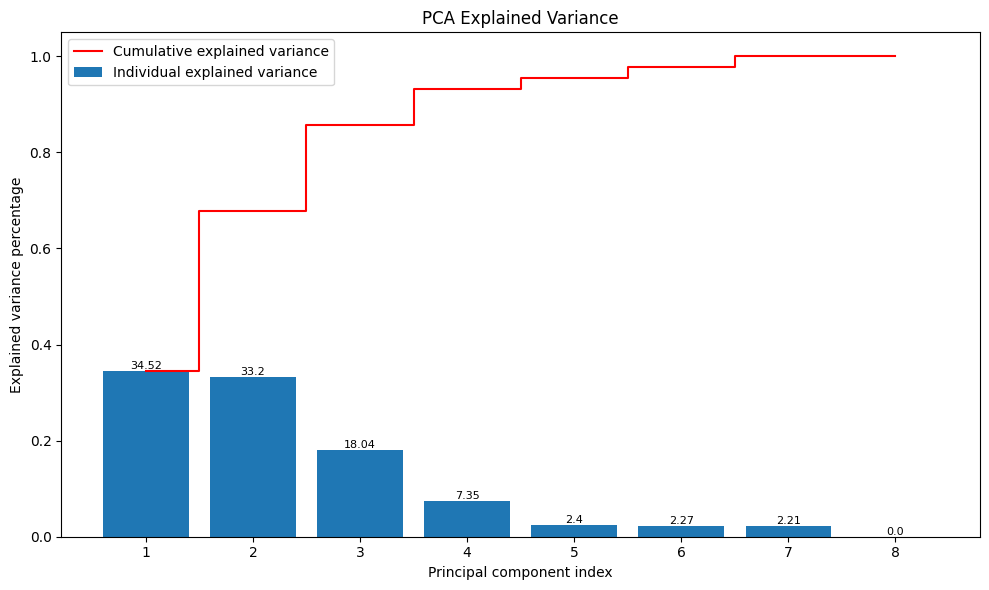

In [22]:
# Define PCA function
pca = PCA()
#This line creates an instance of the PCA class from the sklearn.decomposition module.
pca.fit(df_transformed) 
#This line fits the PCA model to the data in df_transformed.

# PCA variance explained
exp_var = pca.explained_variance_ratio_
#This attribute of the PCA object contains an array of the percentage of variance explained by each of the selected 
#principal components.
#in the above example with transformed features as age income x0_F and so one till x1_High School it calculates the variance for 
#all 7 of these principal components
cum_exp_var = exp_var.cumsum()
#The cumulative explained variance will be the cumulative sum of the explained variance ratios.
#in the above example it will be
#Cumulative Explained Variance: [0.45 0.75 0.90 0.95 0.98 0.99 1.00]

# Number of components
n_pca_components = len(exp_var)
#gives total number of principal components of the transformed data, in the above example it will be 
#2+2+3=7
#The number of PCA components is equal to the number of original features (or transformed features if preprocessing is done) 
#provided to the PCA

# Create the graphic
plt.figure(figsize=(10, 6))
#This line creates a new figure with a specified size of 10 inches by 6 inches.
bars = plt.bar(range(1, n_pca_components + 1), exp_var, align='center',
               label='Individual explained variance')
#plt.bar plots a bar chart with the PCA component numbers on the x-axis and the explained variance (exp_var) on the y-axis.
#range(1, n_pca_components + 1) generates a range of numbers from 1 to the number of PCA components.
#If n_pca_components is 7, range(1, n_pca_components + 1) will generate the sequence [1, 2, 3, 4, 5, 6, 7].
#the code will plot:A bar chart with bars at positions [1, 2, 3, 4, 5, 6, 7] representing the individual explained 
#variance of each component.
#align='center' centers the bars over the tick marks.
#label='Individual explained variance' provides a label for the bars, which will be used in the legend.
plt.step(range(1, n_pca_components + 1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')
#plt.step(...) creates a step plot.
#range(1, n_pca_components + 1) is the x-axis range
#cum_exp_var is the cumulative explained variance
#where='mid' aligcolor='red' sets the color of the step plot to red.ns the steps to the midpoint of the bins.(space between two bars)
#label='Cumulative explained variance' provides a label for the step plot, which will be used in the legend.
#color='red' sets the color of the step plot to red.

# Add labels in each bar
for bar in bars:  #This iterates over each bar in the bars collection. The bars variable contains the bars plotted by the plt.bar function.
    yval = bar.get_height()   #This retrieves the height of the current bar, which represents the explained variance of the corresponding principal component.
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), 
             va='bottom', ha='center', fontsize=8)
#plt.text(x, y, text, va, ha, fontsize) adds the text at the specified coordinates (x, y).    
#yval*100 converts the explained variance to a percentage and round(..., 2) rounds the percentage to two decimal places for clarity.
#va='bottom' aligns the text vertically at the bottom of the specified y-coordinate.
#ha='center' aligns the text horizontally at the center of the specified x-coordinate.
#fontsize=8 sets the font size of the annotation text.

# Adjust others elements of the graphic
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, n_pca_components + 1)))
#The plt.xticks() function is used to get or set the current tick locations and labels of the x-axis.
#By specifying the ticks parameter, you set the positions where the ticks should appear on the x-axis.
#range(1, n_pca_components + 1) generates a sequence of numbers from 1 to n_pca_components (inclusive).
#list(range(...)) converts this sequence into a list.
#This list is passed to ticks, setting the positions of the ticks on the x-axis.
plt.title('PCA Explained Variance')
plt.legend(loc='best')
# automatically places the legend in the optimal location relative to the lines and plot area.
plt.tight_layout()
#The plt.tight_layout() function in Matplotlib is used to automatically adjust the subplot parameters to fit the figure area.
plt.show()

In [23]:
from sklearn.metrics import f1_score
def get_metrics(y_true, y_pred):
    # Calculating F1 scores for each class
    f1_scores_per_class = f1_score(y_true, y_pred, average=None)
#Accuracy Score: the proportion of correct predictions over the total number of predictions made.
#Precision score=TP/TP+FP where TP=number of true positives FP=number of false positives 
#Recall score=TP/TP+FN where FN=false negative
#f1_score=harmonic mean of precision and recall
#Balanced Accuracy=(sensitivty+specificity)/2; specificty=true negative rate (TN/TN+FP); sensitivity=true positive rate(TP/TP+FN)
    
    dict_metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        #this gives macro averaged f1 score
        'F1 Scores per Class': f1_scores_per_class
        #this gives f1 score per class
    }
    return dict_metrics

In [24]:
df_model = df.copy() #This line creates a copy of your original DataFrame df. This ensures that any changes made to df_model do not affect the original DataFrame df
X = df_model[NUMERIC_FEATURES + CATEGORIC_FEATURES]
#X represents your feature matrix, containing columns specified by NUMERIC_FEATURES and CATEGORIC_FEATURES. These 
#features will be used to predict the target variable.
#y is your target variable, which is 'Failure_type' in this case. It contains the labels or classes you want to predict.
y = df_model['Failure_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
#test_size=0.2: Specifies that 20% of the data should be reserved for testing.
#When stratify=y is specified, the train_test_split function will split the data in a way that maintains the same proportion of classes (incase classes are imbalanced) as in the original dataset
#random_state=42 will always yield the same results for random processes, ensuring consistency.
#if we dont use this then the function use a different random seed every time, resulting in different outcomes each time you run the code.

In [25]:
#Create model without PCA and with class_weight

# Creating pipeline without PCA analysis and balanced class with parameter by model
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])
#steps: List of tuples where each tuple contains a name (string) and an estimator object. output of one step is used as input to next
#first step is called preprocessor in which we are using the preprocessor we defined above (ColumnTransformer), which 
#preprocesses the data by scaling numerical features and encoding categorical features
#second step is called model which uses GradientBoostingClassifier as the estimator.
#random_state=2023 ensures reproducibility

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
#class_weight: used to assign weights to variables
#class_weight='balanced: This line specifies that the sample weights should be inversely proportional to class frequencies.
#it adjusts the weights such that classes with fewer instances have higher weights, and vice versa
#y=y_train: The target variable (y_train) is used to determine the class frequencies.
#compute_sample_weight: computes sample weights for each sample in y_train based on its frequency using the specified class_weight strategy.
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights)
#pip_model_no_pca.fit(...): This method fits the entire pipeline (pip_model_no_pca) to the training data (X_train, y_train).
#By passing model__sample_weight=weights, you are instructing the fit method to use the weights array as the sample 
#weights parameter for the GradientBoostingClassifier.

# Step 1: Generate Predictions
y_pred = pip_model_no_pca.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results
metrics

{'Accuracy': 0.9548872180451128,
 'Balanced Accuracy': 0.8193677071112203,
 'Macro Recall': 0.8193677071112203,
 'Macro Precision': 0.5830305073735017,
 'Macro F1': 0.6539249472860765,
 'F1 Scores per Class': array([0.78571429, 0.97651095, 0.53658537, 0.80952381, 0.16129032])}

In [26]:
# Creating pipeline without PCA analysis and balanced class with parameter by model
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights)
#this line is used to train (fit) the pipeline model on the training data while considering the sample weights 
#to make accurate predictions on new, unseen data.

# Updated parameters for GridSearchCV
params = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=2023),
        RandomForestClassifier(random_state=2023),
        GradientBoostingClassifier(random_state=2023),
        DummyClassifier()
    ],
}

# Running GridSearchCV
grid = GridSearchCV(pip_model_no_pca, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
#pip_model_no_pca: pipeline defined earlier, which includes preprocessing steps (scaling and encoding) and a placeholder for the model.
#params: The parameter grid defined above.
#cv=3: 3-fold cross-validation, meaning the data will be split into three parts, and each model will be trained and validated three times using different splits.
#scoring='f1_macro': The evaluation metric used is the F1 score with macro averaging, which is suitable for imbalanced datasets.
#n_jobs=-1: Utilizes all available CPU cores for parallel computation to speed up the grid search process.
#verbose=1: Prints progress messages during the grid search process.
#grid: GridSearchCV object that was created and configured earlier 
#.fit(X_train, y_train): starts the grid search process on the training data X_train and the target variable y_train.

#Grid Search Process:
#GridSearchCV iterates over all the parameter combinations specified in the params dictionary.
#For each parameter combination, it will train the model using cross-validation (as specified by cv=3, meaning 3-fold cross-validation).
#It will evaluate each model using the scoring method defined (scoring='f1_macro'), which in this case is the macro-averaged F1 score.
#The results of these evaluations, including the mean and standard deviation of the test scores, fit times, and other metrics, are stored in the cv_results_ attribute of the GridSearchCV object.

# Collecting and printing the results
results = pd.DataFrame(grid.cv_results_) #attribute of the GridSearchCV object contains a dictionary with detailed results from the cross-validation process.
#information like parameters tested, mean test scores, standard deviation of the test scores, fit times, etc.
#pd.DataFrame(grid.cv_results_): This converts the dictionary of results into a pandas DataFrame for easier manipulation and analysis.
best_model_index = results['mean_test_score'].idxmax()
#results['mean_test_score']: Accesses the column in the DataFrame that contains the mean test scores for each parameter combination tested during the grid search.
#idxmax(): Returns the index of the row with the highest mean test score, which corresponds to the best model.
best_model_params = results.loc[best_model_index, 'params']
#results.loc[best_model_index]: Selects the row in the DataFrame that corresponds to the best model, as identified in the previous step.
#['params']: Accesses the 'params' column of that row, which contains the parameters used for that specific model.

# View results
print("Best model:")
print(best_model_params)
print(best_model_index)
print(pip_model_no_pca)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best model:
{'model': GradientBoostingClassifier(random_state=2023)}
2
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('num_features',
                                                                   StandardScaler())]),
                                                  ['Air_temperature',
                                                   'Process_temperature',
                                                   'Rotational_speed', 'Torque',
                                                   'Tool_wear']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('cat_features',
                                                                   OneHotEncoder())]),
                                                  ['Type'])])),
              

In [27]:
# New parameters for fine-tuning the RandomForestClassifier
fine_tune_params = {
    
    'model__n_estimators': [50, 100, 200, 300, 400, 500], #This hyperparameter specifies the number of boosting stages to be run. More stages can improve performance but will increase training time.
    'model__max_depth': [None, 5, 10, 15, 20] #Controlling the depth of individual estimators helps manage overfitting.
    #Very deep trees can model complex relationships but may overfit the training data, while shallower trees might underfit.
}

# Running a new GridSearchCV for fine-tuning
fine_tune_grid = GridSearchCV(pip_model_no_pca, fine_tune_params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
#GridSearchCV:  object from sklearn.model_selection that performs an exhaustive search over specified hyperparameter values for an estimator.
#pip_model_no_pca: This is your pipeline that includes the preprocessing steps and the GradientBoostingClassifier.
#fine_tune_params: This is the dictionary containing the hyperparameters to fine-tune.
#cv=3: This sets the number of cross-validation folds to 3.
#scoring='f1_macro': This specifies that the scoring metric to be used is the macro-averaged F1 score.
#n_jobs=-1: This parameter tells the grid search to use all available CPU cores for parallel processing.
#verbose=1: This sets the verbosity level to 1, which means some information will be printed during the execution.
fine_tune_grid.fit(X_train, y_train)
#fit(X_train, y_train): This method fits the GridSearchCV object to the training data (X_train and y_train). 
#It will search for the best hyperparameters specified in fine_tune_params using cross-validation on the training set.


# Collecting and printing the fine-tuned results
fine_tuned_results = pd.DataFrame(fine_tune_grid.cv_results_)
fine_tuned_best_index = fine_tuned_results['mean_test_score'].idxmax()
fine_tuned_best_params = fine_tuned_results.loc[fine_tuned_best_index, 'params']

# Print best model parameters
print("Best fine-tuned model parameters:")
print(fine_tuned_best_params)

# Finding the best estimator paramaters
tuned_model = fine_tune_grid.best_estimator_
#fine_tune_grid.best_estimator_: This attribute of the GridSearchCV object contains the best model found during the 
#grid search. The best model is the one that achieved the highest cross-validated score according to the specified scoring metric (f1_macro in this case).
y_pred = tuned_model.predict(X_test)
y_pred2 = tuned_model.predict(X_train)
#uses the best model (tuned_model) to make predictions on the test set (X_test). The output y_pred will be an array of predicted class labels for the test set.

# View new perfomance (focus on F1-score)
get_metrics(y_train, y_pred2)
get_metrics(y_test, y_pred)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best fine-tuned model parameters:
{'model__max_depth': 5, 'model__n_estimators': 200}


{'Accuracy': 0.9834586466165414,
 'Balanced Accuracy': 0.640649796235251,
 'Macro Recall': 0.640649796235251,
 'Macro Precision': 0.6778613323821979,
 'Macro F1': 0.6563972277427178,
 'F1 Scores per Class': array([0.86956522, 0.99173127, 0.62068966, 0.8       , 0.        ])}

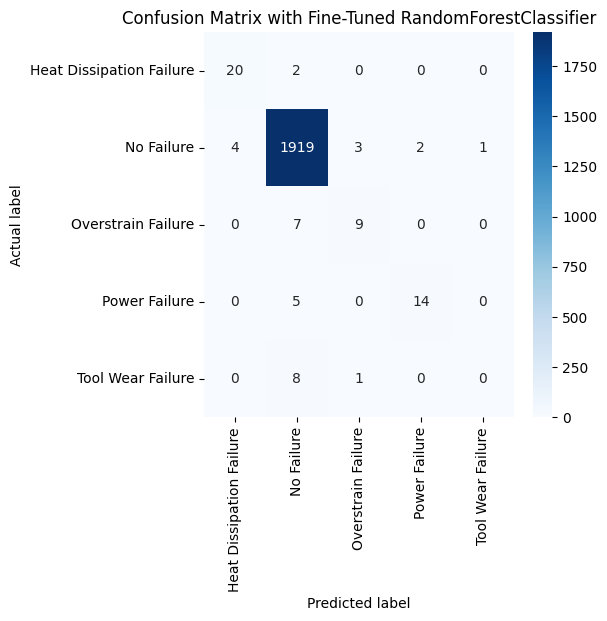

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)#Computes a confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(5, 5))  # Larger figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Use 'd' to format numbers as integers
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_pred))
#Creates a heatmap of the confusion matrix using seaborn
#annot=True: Displays the numerical values in each cell.
#fmt='d': Formats the numbers as integers.
#cmap='Blues': Sets the color palette to blue shades.
#
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Fine-Tuned RandomForestClassifier')
plt.show()